In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('../jupyter/environment/18-Naive-Bayes-and-NLP/31640132-moviereviews[UdemyIran.Com].csv')


In [3]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


,label,review
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1995,NaN,NaN
1996,NaN,NaN
1997,NaN,NaN
1998,NaN,NaN


In [10]:
df.dropna(axis=0,how='any',inplace=True)

In [11]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [15]:
s='   '
s.isspace()

True

In [21]:
df=df[~df.review.str.isspace()]

In [23]:
df[df.review.apply(lambda review: review=='')]

,label,review


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [26]:
df.reset_index(inplace=True)

In [27]:
df

,index,label,review
0,0,neg,how do films like mouse hunt get into theatres...
1,1,neg,some talented actresses are blessed with a dem...
2,2,pos,this has been an extraordinary year for austra...
3,3,pos,according to hollywood movies made in last few...
4,4,neg,my first press screening of 1998 and already i...
...,...,...,...
1933,1995,pos,"i like movies with albert brooks , and i reall..."
1934,1996,pos,it might surprise some to know that joel and e...
1935,1997,pos,the verdict : spine-chilling drama from horror...
1936,1998,pos,i want to correct what i wrote in a former ret...


In [28]:
df.label.value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
cv=CountVectorizer(stop_words='english')

In [150]:
all_features=cv.fit_transform(df.review)

In [151]:
X=all_features
y=df.label

In [148]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=88)

In [136]:
matrix=cv.fit_transform(df[df.label=='neg'].review)

In [142]:
freq=zip(cv.get_feature_names_out(),matrix.sum(axis=0).tolist()[0] )

In [143]:
sorted(freq,key= lambda x: x[1])[::-1]

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634),
 ('people', 628),
 ('director', 627),
 ('films', 623),
 ('know', 617),
 ('scenes', 608),
 ('man', 607),
 ('big', 583),
 ('new', 553),
 ('movies', 544),
 ('better', 514),
 ('end', 511),
 ('life', 504),
 ('best', 497),
 ('work', 486),
 ('isn', 475),
 ('script', 467),
 ('audience', 455),
 ('going', 448),
 ('funny', 440),
 ('love', 437),
 ('think', 436),
 ('thing', 434),
 ('gets', 426),
 ('look', 417),
 ('makes', 415),
 ('comedy', 413),
 ('actually', 412),
 ('real', 410),
 ('did', 408),
 ('long', 405),
 ('old', 390),
 ('year', 385),
 ('things', 384),
 ('ve', 382),
 ('great', 379),
 ('role', 377),
 ('fact', 377),
 ('played', 376),
 ('say', 375),
 ('minu

In [144]:
matrix2=cv.fit_transform(df[df.label=='pos'].review)

In [146]:
freq2=zip(cv.get_feature_names_out(),matrix2.sum(axis=0).tolist()[0])

In [147]:
sorted(freq2,key=lambda x:x[1])[::-1]

[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702),
 ('great', 692),
 ('scene', 675),
 ('world', 646),
 ('love', 634),
 ('scenes', 604),
 ('movies', 604),
 ('plot', 577),
 ('doesn', 576),
 ('director', 564),
 ('don', 555),
 ('makes', 543),
 ('know', 529),
 ('performance', 528),
 ('seen', 513),
 ('work', 507),
 ('end', 504),
 ('action', 501),
 ('role', 475),
 ('years', 474),
 ('real', 456),
 ('year', 455),
 ('big', 448),
 ('old', 445),
 ('audience', 438),
 ('star', 437),
 ('young', 431),
 ('john', 431),
 ('family', 431),
 ('things', 430),
 ('right', 428),
 ('gets', 408),
 ('comedy', 406),
 ('ve', 403),
 ('long', 403),
 ('going', 400),
 ('cast', 399),
 ('quite', 398),
 ('come', 395),
 ('fact', 387),

In [153]:
from sklearn.naive_bayes import MultinomialNB

In [154]:
classifer=MultinomialNB()

In [155]:
classifer.fit(X_train,y_train)

MultinomialNB()

In [157]:
pred1=classifer.predict(X_test)

In [158]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay


In [159]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         neg       0.80      0.83      0.81       285
         pos       0.83      0.80      0.82       297

    accuracy                           0.81       582
   macro avg       0.81      0.81      0.81       582
weighted avg       0.81      0.81      0.81       582



In [161]:
cm=confusion_matrix(y_test,pred1)

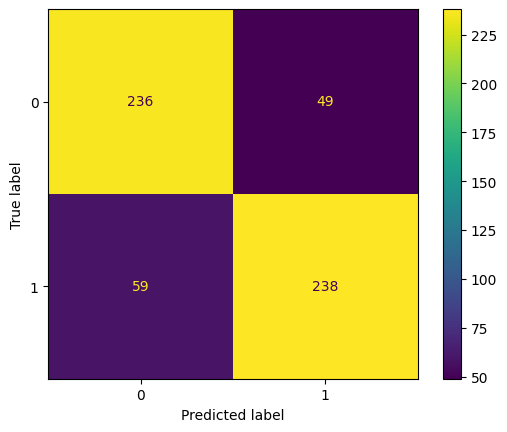

In [162]:
ConfusionMatrixDisplay(cm).plot()

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [164]:
X=df.review
y=df.label

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [170]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])


In [171]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [173]:
pred2=pipe.predict(X_test)

In [174]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



In [175]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('nbc',MultinomialNB())])


In [176]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nbc', MultinomialNB())])

In [177]:
pred3=pipe.predict(X_test)

In [178]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388

